For this we use 
Predict students' dropout and academic success
https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
36 Features 4.42K

In [1]:
import pandas as pd

df = pd.read_csv('/Users/xxxxx/DP/studentData.csv', delimiter=';')

df.head() 

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
dft=df.iloc[:,-1:]
dft.head()

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate


Unique Target variable

In [3]:
print(df["Target"].unique())

['Dropout' 'Graduate' 'Enrolled']


we are encoding target vaiable as integer. This is a requirment in DiffPrivlib but not for ForestDiffusion

In [4]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
dft = label_encoder.fit_transform(dft)
dft

/opt/homebrew/Caskroom/miniconda/base/envs/ForestDiffusion/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 2, 0, ..., 0, 2, 2])

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#Gaduated - 2 Enrolled - 1 Dropout 0
hist_O_Target, bins_O_Target = np.histogram(dft)
#plt.bar(bins[:-1], hist, width=(bins[1] - bins[0]) * 0.9)
#plt.show()

In [6]:
from diffprivlib import tools as dp
hist_dp_Target, bins_dp_Target = dp.histogram(dft,epsilon=1)
#dp_hist = dp_hist / dp_hist.sum()

#plt.bar(dp_bins[:-1], dp_hist, width=(dp_bins[1] - dp_bins[0]) * 0.9)
#plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/ForestDiffusion/lib/python3.10/site-packages/diffprivlib/tools/histograms.py:137: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  warnings.warn("Range parameter has not been specified. Falling back to taking range from the data.\n"


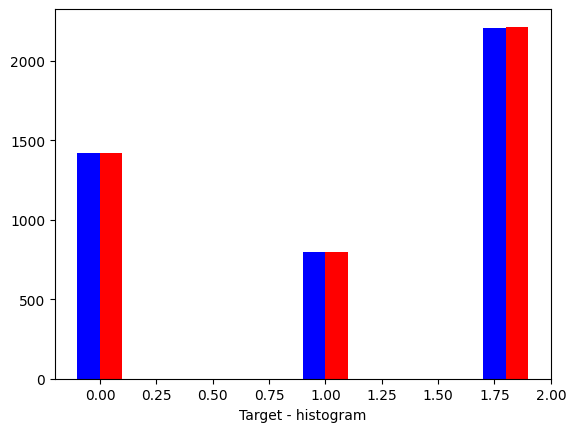

In [7]:
width=(bins_dp_Target[1] - bins_dp_Target[0]) * 0.5
fig = plt.figure()
ax = fig.add_subplot(111)
# matplotlib 3.0 you have to use align
ax.bar(bins_O_Target[:-1] - width,hist_O_Target,width,color='b',label='Original Target',align='edge')
ax.bar(bins_O_Target[:-1],hist_dp_Target,width,color='r',label='DiffPriv Target',align='edge')
ax.set_xlabel('Target - histogram')
plt.legend()
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
hist_O_grade, bins_O_grade = np.histogram(df['Previous qualification (grade)'].to_numpy())
#hist = hist / hist.sum()
#plt.bar(bins_O_grade[:-1], hist_O_grade, width=(bins_O_grade[1]- bins_O_grade[0]) * 0.9)
#plt.show()

In [9]:
from diffprivlib import tools as dp
import matplotlib.pyplot as plt
hist_dp_grade, bins_dp_grade = dp.histogram(df['Previous qualification (grade)'].to_numpy(),epsilon=0.01)
#hist = hist / hist.sum()
#plt.bar(bins_dp_grade[:-1], hist_dp_grade, width=(bins_dp_grade[1]-bins_dp_grade[0]) * 0.9)
#plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/ForestDiffusion/lib/python3.10/site-packages/diffprivlib/tools/histograms.py:137: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  warnings.warn("Range parameter has not been specified. Falling back to taking range from the data.\n"


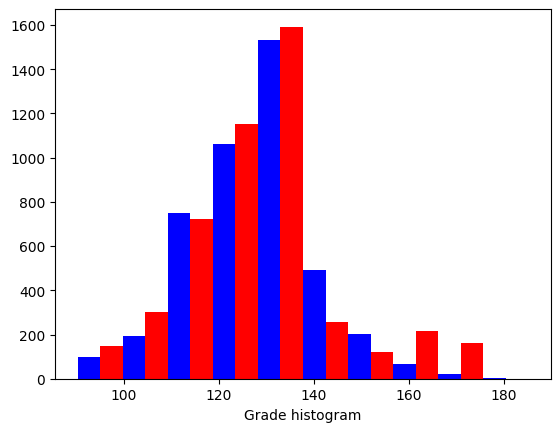

In [10]:
width=(bins_O_grade[1] - bins_O_grade[0]) * 0.5
fig = plt.figure()
ax = fig.add_subplot(111)
# matplotlib 3.0 you have to use align
ax.bar(bins_O_grade[:-1] - width,hist_O_grade,width,color='b',label='Original',align='edge')
ax.bar(bins_O_grade[:-1],hist_dp_grade,width,color='r',label='DiffPriv',align='edge')
ax.set_xlabel('Grade histogram')
plt.legend()
plt.show()

In [11]:
dfd=df.drop('Target', axis = 1)
dfd.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [12]:
ndX=dfd.to_numpy()

In [13]:
ndX

array([[ 1.  , 17.  ,  5.  , ..., 10.8 ,  1.4 ,  1.74],
       [ 1.  , 15.  ,  1.  , ..., 13.9 , -0.3 ,  0.79],
       [ 1.  ,  1.  ,  5.  , ..., 10.8 ,  1.4 ,  1.74],
       ...,
       [ 1.  ,  1.  ,  1.  , ..., 13.9 , -0.3 ,  0.79],
       [ 1.  ,  1.  ,  1.  , ...,  9.4 , -0.8 , -3.12],
       [ 1.  , 10.  ,  1.  , ..., 12.7 ,  3.7 , -1.7 ]])

In [14]:
ndY=dft

Generating Synthetic data - Student

In [15]:
%%time
#0,1,2,3,4,5,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32 integer columns
from ForestDiffusion import ForestDiffusionModel
# Classification problem (outcome is categorical)
forest_model = ForestDiffusionModel(ndX, label_y=ndY, n_t=50, duplicate_K=100, bin_indexes=[], cat_indexes=[], int_indexes=[0,1,2,3,4,5,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32], diffusion_type='flow', n_jobs=-1)
Xy_diffusion_gen = forest_model.generate(batch_size=ndX.shape[0]) # last variable will be the label_y

CPU times: user 35.4 s, sys: 42.8 s, total: 1min 18s
Wall time: 45min 27s


In [16]:
df_gen=pd.DataFrame(Xy_diffusion_gen)
df_gen.to_csv('/Users/xxx/DP/studentDataGen.csv',header=False,index=False mode='w')

In [24]:
df_gen.head()
#df_gen.shape[0]

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,17.0,2.0,9773.0,1.0,1.0,136.297985,1.0,37.0,19.0,...,0.0,6.0,7.0,6.0,14.0,0.0,7.603525,2.603651,0.319347,2.0
1,1.0,1.0,4.0,9120.0,1.0,1.0,129.112581,1.0,1.0,1.0,...,0.0,5.0,7.0,5.0,15.0,0.0,12.401339,0.498036,1.790064,2.0
2,1.0,39.0,1.0,9604.0,1.0,1.0,133.150736,1.0,1.0,19.0,...,0.0,6.0,13.0,3.0,12.0,0.0,10.828991,1.397702,1.742505,0.0
3,1.0,43.0,3.0,9554.0,1.0,1.0,129.472090,1.0,19.0,2.0,...,0.0,8.0,8.0,8.0,13.0,0.0,13.894791,-0.297836,0.794437,1.0
4,1.0,1.0,1.0,9166.0,1.0,1.0,128.228917,1.0,1.0,38.0,...,0.0,5.0,8.0,5.0,11.0,0.0,7.600000,2.600141,0.315872,1.0


In [38]:
#import numpy as np
#import matplotlib.pyplot as plt
#Graduated - 2 Enrolled - 1 Dropout 0
hist_G_Target, bins_G_Target = np.histogram(df_gen[36].to_numpy())
#plt.bar(bins_G_Target[:-1], hist_G_Target, width=(bins_G_Target[1] - bins_G_Target[0]) * 0.9)
#plt.show()

In [31]:
hist_G_grade, bins_G_Grade = np.histogram(df_gen[6].to_numpy())

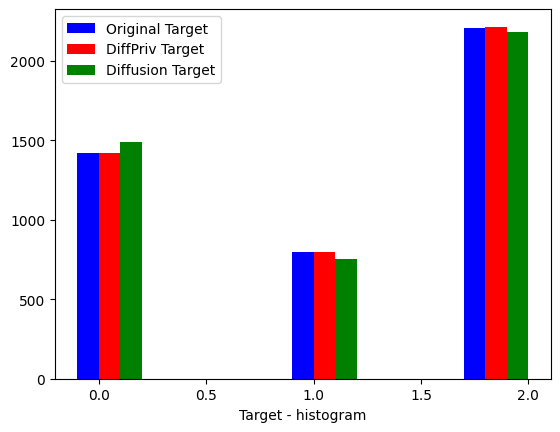

In [39]:
width=(bins_dp_Target[1] - bins_dp_Target[0]) * 0.5
fig = plt.figure()
ax = fig.add_subplot(111)
# Dropout - 0 Enrolled - 1 Graduated - 2
ax.bar(bins_O_Target[:-1] - width,hist_O_Target,width,color='b',label='Original Target',align='edge')
ax.bar(bins_O_Target[:-1],hist_dp_Target,width,color='r',label='DiffPriv Target',align='edge')
ax.bar(bins_O_Target[:-1] + width,hist_G_Target,width,color='g',label='Diffusion Target',align='edge')
ax.set_xlabel('Target - histogram')
plt.legend()
plt.show()

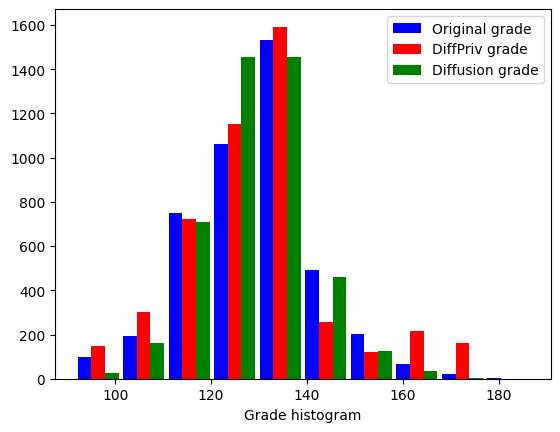

In [40]:
width=(bins_O_grade[1] - bins_O_grade[0]) * 0.3
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(bins_O_grade[:-1] - width,hist_O_grade,width,color='b',label='Original grade',align='edge')
ax.bar(bins_O_grade[:-1],hist_dp_grade,width,color='r',label='DiffPriv grade',align='edge')
ax.bar(bins_O_grade[:-1] + width,hist_G_grade,width,color='g',label='Diffusion grade',align='edge')
ax.set_xlabel('Grade histogram')
plt.legend()
plt.show()